In [2]:
import imagej

# Start up ImageJ
ij = imagej.init()

In [3]:
image = ij.io().open("https://fiji.sc/samples/blobs.png")
image

<java object 'net.imagej.DefaultDataset'>

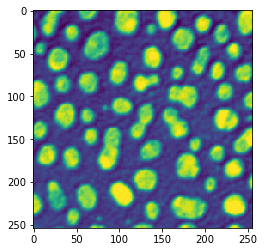

In [4]:
ij.py.show(image)

In [5]:
ij.op().help('gauss')

'Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.filter.gauss.DefaultGaussRA(
		RandomAccessibleInterval out,
		RandomAccessible in,
		double[] sigmas)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.gauss.GaussRAISingleSigma(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double sigma,
		OutOfBoundsFactory outOfBounds?)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.gauss.DefaultGaussRAI(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double[] sigmas,
		OutOfBoundsFactory outOfBounds?)'

In [10]:
blurred = ij.op().filter().gauss(image, 5)
blurred

<java object 'net.imglib2.img.planar.PlanarImg'>

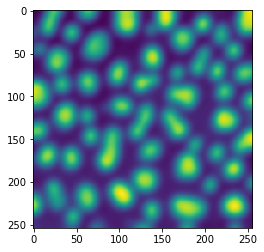

In [9]:
ij.py.show(blurred)

In [48]:
import numpy as np
perfect_psf_numpy = np.zeros([31, 31])
perfect_psf_numpy[15, 15] = 1

perfect_psf_imagej = ij.py.to_java(perfect_psf_numpy)
type(perfect_psf_imagej)

<java class 'net.imglib2.python.ReferenceGuardingRandomAccessibleInterval'>

In [49]:
psf = ij.op().filter().gauss(perfect_psf_imagej, 5)

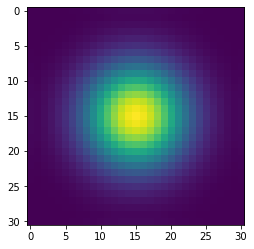

In [50]:
ij.py.show(psf)

In [51]:
ij.op().help('richardsonLucy')

'Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.deconvolve.PadAndRichardsonLucy(
		RandomAccessibleInterval out,
		RandomAccessibleInterval in1,
		RandomAccessibleInterval in2,
		long[] borderSize?,
		OutOfBoundsFactory obfInput?,
		OutOfBoundsFactory obfKernel?,
		RealType outType?,
		ComplexType fftType?,
		int maxIterations,
		boolean nonCirculant?,
		boolean accelerate?)
	(RandomAccessibleInterval out) =
	net.imagej.ops.deconvolve.RichardsonLucyC(
		RandomAccessibleInterval out,
		RandomAccessibleInterval in1,
		RandomAccessibleInterval in2,
		RandomAccessibleInterval fftInput?,
		RandomAccessibleInterval fftKernel?,
		boolean performInputFFT?,
		boolean performKernelFFT?,
		int maxIterations,
		UnaryInplaceOp accelerator?,
		UnaryComputerOp updateOp?,
		RandomAccessibleInterval raiExtendedEstimate?,
		ArrayList iterativePostProcessingOps?)'

In [58]:
deconvolved = ij.op().deconvolve().richardsonLucy(blurred, psf, 10)
deconvolved

[java.lang.Enum.toString] ConvolveFFTC: fftInput = ArrayImg [145x315], fftKernel = ArrayImg [145x315][java.lang.Enum.toString] 


<java object 'net.imglib2.img.planar.PlanarImg'>

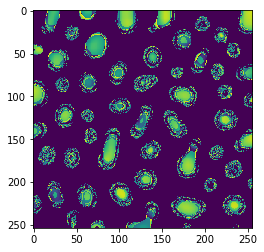

In [59]:
ij.py.show(deconvolved)